# Testing the magnetic field in 3D

Comparing against a 3DEG in a magnetic field

0.19634954084936207 0.009638285547938826


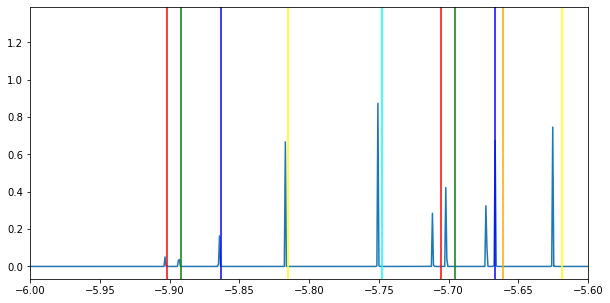

In [6]:
import matplotlib.pyplot as plt
import numpy as np

h = 6.62607015e-34 # J/s
e = 1.60217662e-19 # Coulomb
a = 1e-9  # meters (typical length scale)

N = 64
Nz = N
mult = 1

t = 1
T = h/e/a/a 
print("Tesla", T/N)

# spacings
de1 = 4*np.pi/N*mult
de2 = (2*np.pi/Nz)**2
print(de1, de2)

# band edge in 3D and 2D
E0 = -6*t
# E0 = -4*t

# calculate the Landau levels
NI = 10
NJ = 10
landaus = []
colors = []
c = ['red', 'green', 'blue', 'yellow', 'cyan','orange']*5
for i in range(NI):
    for j in range(NJ):
        E = E0 + de1*(0.5 + i) + j*j*de2
        landaus.append(E) 
        colors.append(c[j])
# landaus.sort()
# landaus = landaus[:15]
# print(landaus)

# fetch DoS calculated with KITE
basedir = "/mnt/data/projects_sync/codes/kitedevelop/tests/test_mag"
file = basedir + "/dos.dat"
dos = np.loadtxt(file)


# check if the Landau levels are in the predicted spot
fig, axs = plt.subplots(1,1, figsize=(10,5))
axs.plot(dos[:,0], dos[:,1])
axs.set_xlim([-6,-5.6])
for i,c in zip( landaus, colors):
    axs.axvline(i,c=c)
plt.show()